# 1.Import libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# 2.Import data

In [2]:
df=pd.read_csv("C:/Users/bouzg/Downloads/btc.csv",delimiter=",")

In [3]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 9431 rows and 12 columns


In [4]:
df.head(5)

,Unnamed: 0,symbol,ranking by market cap,name,market cap,price,circulating supply,volume,% 1h,% 24h,% 1wk,file_name
0,362,BTC,1,Bitcoin,"$70,846,063,125",$4291.75,"16,507,500","$2,814,510,000",-2.16%,5.57%,24.99%,r_20170815-071005
1,1417,BTC,1,Bitcoin,"$76,715,293,809",$4639.63,"16,534,787","$1,731,360,000",0.56%,2.73%,10.53%,r_20170831-114005
2,2498,BTC,1,Bitcoin,"$71,411,773,702",$4316.74,"16,542,987","$2,080,400,000",-2.51%,-6.91%,0.54%,r_20170904-085005
3,3568,BTC,1,Bitcoin,"$67,158,717,638",$4066.51,"16,515,075","$2,796,620,000",-0.71%,-5.92%,9.26%,r_20170819-065505
4,4615,BTC,1,Bitcoin,"$67,243,714,005",$4071.86,"16,514,250","$2,611,450,000",-1.38%,-5.83%,13.93%,r_20170818-210005


# 3. Preprocessing

In [5]:
df=df.drop(columns=["Unnamed: 0","file_name","ranking by market cap","price","circulating supply","volume","% 1h","% 24h","% 1wk"],axis=1) #drop les deux colonnes

In [6]:
#remplacer la virgule par un vide
df['market cap'] =df['market cap'].str.replace(',', '')

In [7]:
#supprimer les signes dollars
df['market cap'] =pd.to_numeric(df['market cap'].str.replace('$', ''))

In [8]:
df.head(5)

,symbol,name,market cap
0,BTC,Bitcoin,70846063125
1,BTC,Bitcoin,76715293809
2,BTC,Bitcoin,71411773702
3,BTC,Bitcoin,67158717638
4,BTC,Bitcoin,67243714005


# 4. Simple Moving Average.

In [9]:
df['ma_rolling_3-Day'] = df['market cap'].rolling(window=3).mean().shift(1) #3 day SMA
df['ma_rolling_30-Day'] = df['market cap'].rolling(window=30).mean().shift(1)#30 day SMA
df['ma_rolling_3-Months'] = df['market cap'].rolling(window=90).mean().shift(1) #90 SMA

,symbol,name,market cap,ma_rolling_3-Day,ma_rolling_30-Day,ma_rolling_3-Months
0,BTC,Bitcoin,70846063125,NaN,NaN,NaN
1,BTC,Bitcoin,76715293809,NaN,NaN,NaN
2,BTC,Bitcoin,71411773702,NaN,NaN,NaN
3,BTC,Bitcoin,67158717638,7.299104e+10,NaN,NaN
4,BTC,Bitcoin,67243714005,7.176193e+10,NaN,NaN
...,...,...,...,...,...,...
9426,BTC,Bitcoin,71308175058,6.985996e+10,6.701422e+10,6.704794e+10
9427,BTC,Bitcoin,70475225454,7.052990e+10,6.752149e+10,6.724237e+10
9428,BTC,Bitcoin,72348215185,6.962013e+10,6.799893e+10,6.726716e+10
9429,BTC,Bitcoin,68520412389,7.137721e+10,6.867417e+10,6.740239e+10


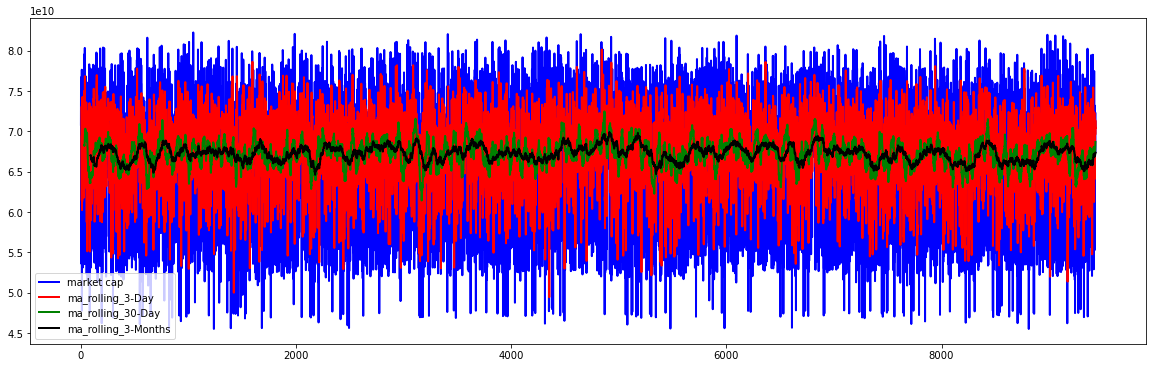

In [10]:
colors = ['blue', 'red', 'green', 'black']
df.plot(color=colors, linewidth=2, figsize=(20,6))
plt.savefig("plot1.png")

# 5.Weighted Moving Average

In [13]:
#fonction qui calcul la moyenne pondérée
def moy_pond(weights):
    def calc(x):
        return (weights*x).mean()
    return calc #chaque observation sera multipliée par son (ordre/nombre de cloture)

<AxesSubplot:>

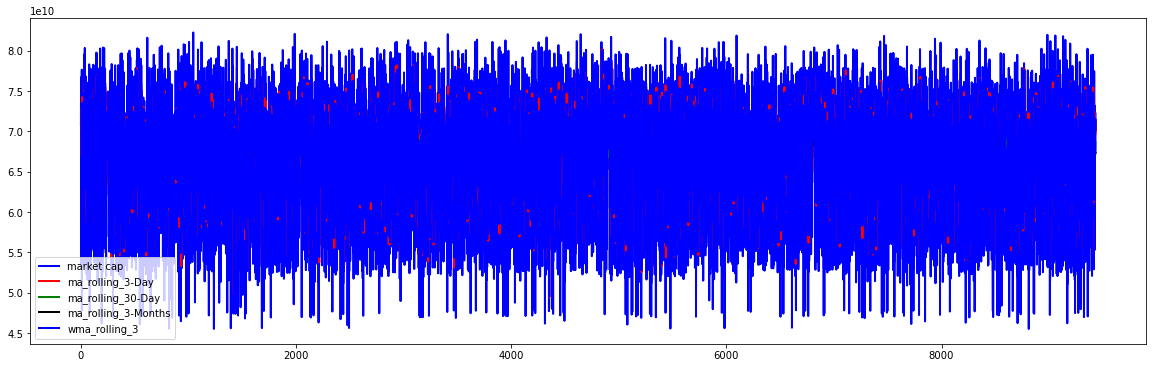

In [14]:
df['market cap'].rolling(window=3).apply(moy_pond(np.array([0.5,1,1.5]))).shift(1)
df['wma_rolling_3'] = df['market cap'].rolling(window=3).apply(moy_pond(np.array([0.5,1,1.5]))).shift(1)
df.plot(color=colors, linewidth=2, figsize=(20,6))
plt.savefig("plt2.png")

# Exponential Weighted Moving Average.

In [15]:
df['market cap'].ewm(span=3, adjust=False, min_periods=0).mean()
#le poid le plus grand sera attribué au prix le plus récent, 
#Cela donne à la moyenne mobile exponentielle l’avantage d’être plus rapide que la moyenne mobile simple.

0       7.084606e+10
1       7.378068e+10
2       7.259623e+10
3       6.987747e+10
4       6.856059e+10
            ...     
9426    6.978009e+10
9427    7.012766e+10
9428    7.123794e+10
9429    6.987917e+10
9430    6.868462e+10
Name: market cap, Length: 9431, dtype: float64

In [16]:
df['ewm_window_3'] = df['market cap'].ewm(span=3, adjust=False, min_periods=0).mean().shift(1)
df

,symbol,name,market cap,ma_rolling_3-Day,ma_rolling_30-Day,ma_rolling_3-Months,wma_rolling_3,ewm_window_3
0,BTC,Bitcoin,70846063125,NaN,NaN,NaN,NaN,NaN
1,BTC,Bitcoin,76715293809,NaN,NaN,NaN,NaN,7.084606e+10
2,BTC,Bitcoin,71411773702,NaN,NaN,NaN,NaN,7.378068e+10
3,BTC,Bitcoin,67158717638,7.299104e+10,NaN,NaN,7.308533e+10,7.259623e+10
4,BTC,Bitcoin,67243714005,7.176193e+10,NaN,NaN,7.016917e+10,6.987747e+10
...,...,...,...,...,...,...,...,...
9426,BTC,Bitcoin,71308175058,6.985996e+10,6.701422e+10,6.704794e+10,6.948973e+10,6.825201e+10
9427,BTC,Bitcoin,70475225454,7.052990e+10,6.752149e+10,6.724237e+10,7.021384e+10,6.978009e+10
9428,BTC,Bitcoin,72348215185,6.962013e+10,6.799893e+10,6.726716e+10,7.018650e+10,7.012766e+10
9429,BTC,Bitcoin,68520412389,7.137721e+10,6.867417e+10,6.740239e+10,7.155055e+10,7.123794e+10


<AxesSubplot:>

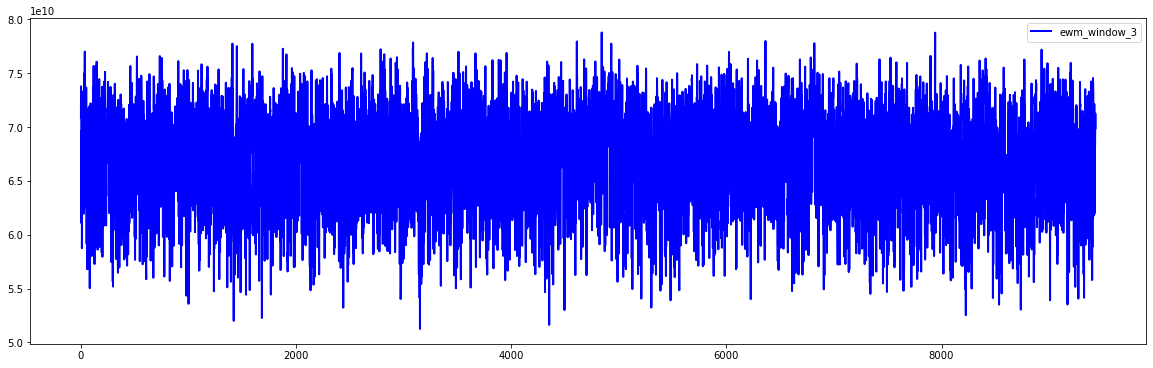

In [17]:
df[['ewm_window_3']].plot(color=colors, linewidth=2, figsize=(20,6))
plt.savefig("plt3.png")